In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

# a function to return errors
def find_error(y_test, y_pred):
  mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
  #squared True returns MSE value, False returns RMSE value.
  mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
  rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  r2 = r2_score(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)

  #printing errors
  print("MAE:",mae)
  print("MSE:",mse)
  print("RMSE:",rmse)
  print("R2", r2)
  print("MAPE", mape)

In [17]:
from math import ceil

#balancing the unbalanced data so that they have equal amount of each label type
def balance_data(data, random_state=0):
    X = data.drop("Label", axis=1)
    y = data["Label"]
    class_counts = y.value_counts()  #counting the number of classes in labels of dataset
    minority_class_count = ceil(class_counts.min() / 5) #setting so that the row size is reduced  to 1/5th of the original minimum
    balanced_data = pd.DataFrame(columns=data.columns)  #making an empty dataframe

    for label in class_counts.index:
        class_samples = data[data["Label"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)   #resampling dataset to make so that it has only min_count rows of each type
        balanced_data = pd.concat([balanced_data, resampled_samples])

    balanced_data = balanced_data.sample(frac=1, random_state=random_state)

    return balanced_data

In [18]:
#function to encode the non-numerical columns to numerics using LabelEncoder
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].fillna('N') #filling empty cells in dataframe
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)  #encoding
    return df

In [10]:
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='IRCTC Stock Price')
df.head()

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023


In [22]:
def splitData(df):
  X = df[['Open', 'High', 'Low', 'Volume']]  # You can add more features if necessary
  y = df['Price']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test

In [21]:
# Convert the 'Price' column to string type before using the .str accessor
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
df['Open'] = df['Open'].astype(str).str.replace(',', '').astype(float)
df['High'] = df['High'].astype(str).str.replace(',', '').astype(float)
df['Low'] = df['Low'].astype(str).str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].astype(str).apply(lambda x: float(x.replace('M', '').replace('K', '')) * (1e6 if 'M' in x else 1e3) if x.isalpha() else float(x))

In [29]:
def linearRegression(df):

  X_train, X_test, y_train, y_test = splitData(df)  #splitting the dataframe into train and test data

  regressor = LinearRegression()  #creating a linear regression object

  regressor.fit(X_train, y_train)  #training the model

  y_pred = regressor.predict(X_test) #predicting the result

  #plotting the graph
  # Convert X_test to a 1-dimensional array for plotting
  plt.scatter(X_test.index, y_test, color ='b')
  plt.plot(X_test.index, y_pred, color ='k')

  plt.show()

  print("regressor_score: ", regressor.score(X_test, y_test))  #printing the score

  find_error(y_test, y_pred)  #printing the errors

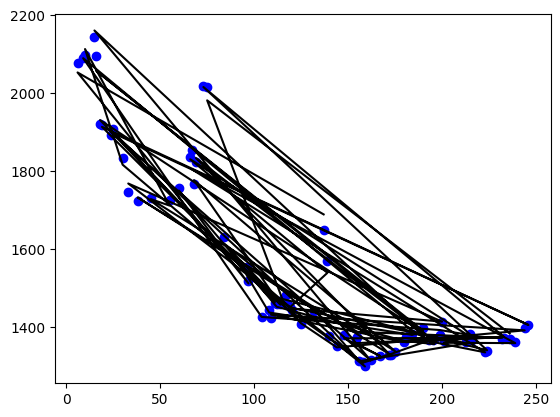

regressor_score:  0.9970770922429918
MAE: 8.60722138005435
MSE: 174.79034368015306
RMSE: 13.22082991646716
R2 0.9970770922429918
MAPE 0.005233318023639769


In [32]:
linearRegression(df)

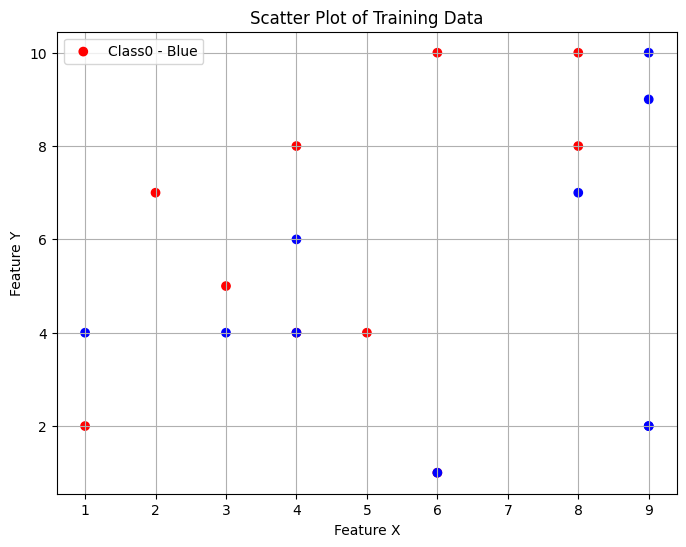

In [2]:
#Q3

# Seed for reproducibility
def Q3():

    np.random.seed(0)

    # Generate 20 random data points for features X and Y
    X = np.random.randint(1, 11, size=(20, 2))
    # Generate random class labels (0 or 1) for these data points
    y = np.random.choice([0, 1], size=20)

    # Scatter plot colors based on class labels
    colors = ['blue' if label == 0 else 'red' for label in y]

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=colors, label='Class0 (Blue) and Class1 (Red)')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend(['Class0 - Blue', 'Class1 - Red'])
    plt.grid(True)
    plt.show()

Q3()


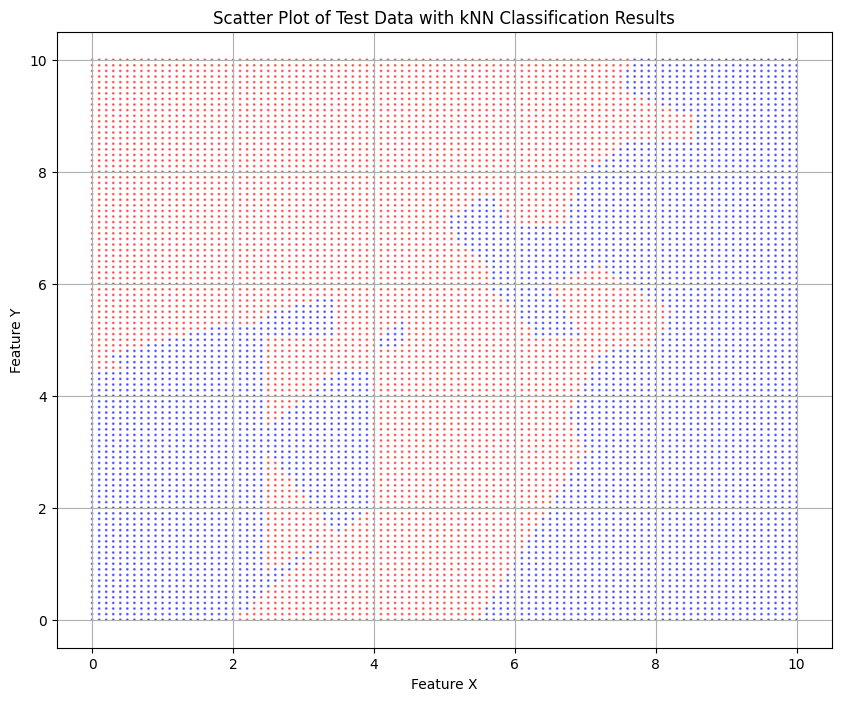

In [3]:
def Q4():
    # Seed for reproducibility
    np.random.seed(0)

    # Generate training data
    X_train = np.random.randint(1, 11, size=(20, 2))
    y_train = np.random.choice([0, 1], size=20)

    # Generate test data
    X_test = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])
    y_test = np.zeros(X_test.shape[0])  # Placeholder for actual predictions

    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Predict on test data
    y_pred = knn.predict(X_test)

    # Scatter plot colors based on predicted class labels
    colors = ['blue' if label == 0 else 'red' for label in y_pred]

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, alpha=0.5)
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Test Data with kNN Classification Results')
    plt.grid(True)
    plt.show()

Q4()

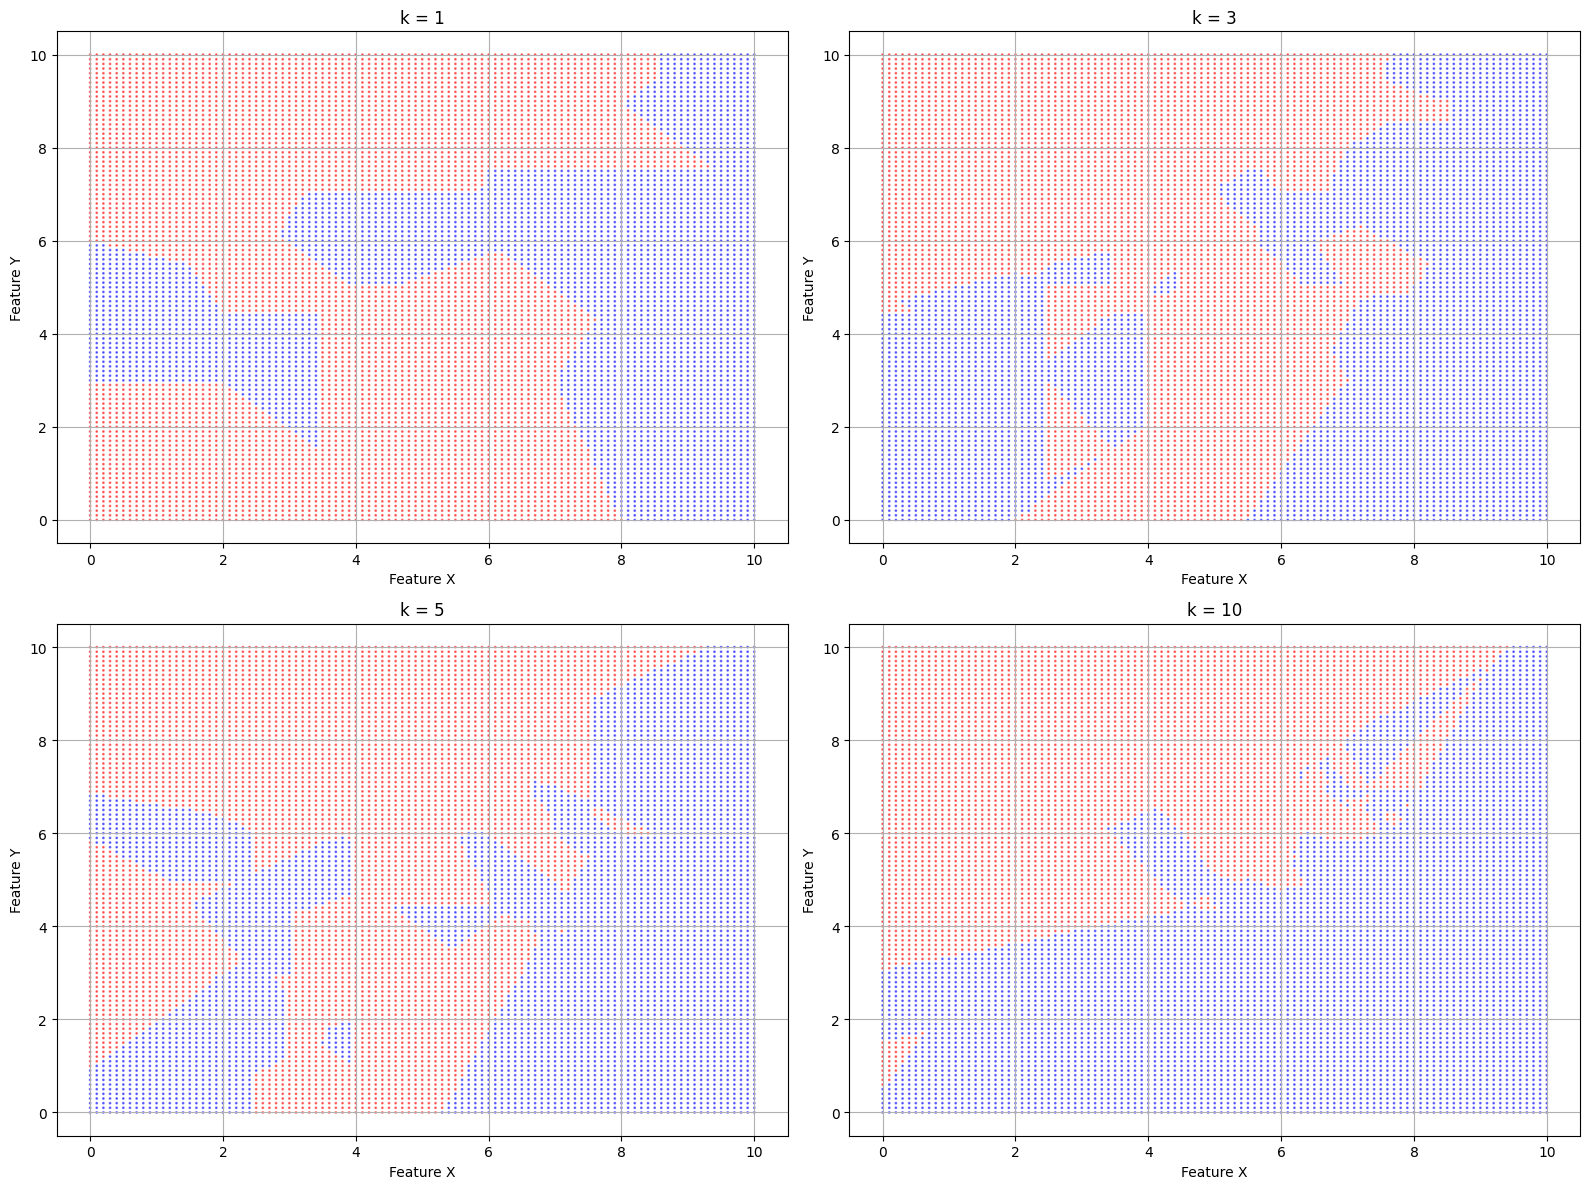

In [4]:
def Q5():

    # Seed for reproducibility
    np.random.seed(0)

    # Generate training data
    X_train = np.random.randint(1, 11, size=(20, 2))
    y_train = np.random.choice([0, 1], size=20)

    # Generate test data
    X_test = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])

    # Define a range of k values to test
    k_values = [1, 3, 5, 10]

    # Create a plot for each k value
    plt.figure(figsize=(16, 12))

    for i, k in enumerate(k_values, start=1):
        # Train kNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Predict on test data
        y_pred = knn.predict(X_test)

        # Scatter plot colors based on predicted class labels
        colors = ['blue' if label == 0 else 'red' for label in y_pred]

        # Create subplot for the current k value
        plt.subplot(2, 2, i)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, alpha=0.5)
        plt.title(f'k = {k}')
        plt.xlabel('Feature X')
        plt.ylabel('Feature Y')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

Q5()

In [33]:
df = pd.read_csv('Android_Malware.csv')
df.dropna(inplace=True)
df.drop(' Timestamp', axis = 1, inplace = True)
df.head()

<ipython-input-33-71127ea1fdcb>:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Android_Malware.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [5]:
#function to encode the non-numerical columns to numerics using LabelEncoder
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].fillna('N') #filling empty cells in dataframe
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)  #encoding
    return df

In [6]:
from math import ceil

#balancing the unbalanced data so that they have equal amount of each label type
def balance_data(data, random_state=0):
    X = data.drop("Label", axis=1)
    y = data["Label"]
    class_counts = y.value_counts()  #counting the number of classes in labels of dataset
    minority_class_count = ceil(class_counts.min() / 5) #setting so that the row size is reduced  to 1/5th of the original minimum
    balanced_data = pd.DataFrame(columns=data.columns)  #making an empty dataframe

    for label in class_counts.index:
        class_samples = data[data["Label"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)   #resampling dataset to make so that it has only min_count rows of each type
        balanced_data = pd.concat([balanced_data, resampled_samples])

    balanced_data = balanced_data.sample(frac=1, random_state=random_state)

    return balanced_data

In [34]:
df = balance_data(df)
df = labelencoder(df)
df.head()

<ipython-input-17-50b583461c86>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_data = pd.concat([balanced_data, resampled_samples])


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
271488,534,16613,4,4974,1045,80.0,6.0,7470,2,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
69751,633,15582,2,5419,928,80.0,6.0,14861,22,21,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
143987,304,7083,3,1796,217,80.0,6.0,12695,1,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
303752,517,6822,3,7624,188,80.0,6.0,9000,1,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
184007,471,12893,2,5416,700,80.0,6.0,12725,1,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Flow ID'].plot(kind='hist', bins=20, title='Flow ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[' Source IP'].plot(kind='hist', bins=20, title=' Source IP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[' Source Port'].plot(kind='hist', bins=20, title=' Source Port')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Unnamed: 0', y='Flow ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Flow ID', y=' Source IP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=' Source IP', y=' Source Port', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=' Source Port', y=' Destination IP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Destination Port']
  ys = series['Unnamed: 0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values(' Destination Port', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Destination Port')
_ = plt.ylabel('Unnamed: 0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Destination Port']
  ys = series['Flow ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values(' Destination Port', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Destination Port')
_ = plt.ylabel('Flow ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Destination Port']
  ys = series[' Source IP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values(' Destination Port', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Destination Port')
_ = plt.ylabel(' Source IP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Destination Port']
  ys = series[' Source Port']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values(' Destination Port', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Destination Port')
_ = plt.ylabel(' Source Port')

from matplotlib import pyplot as plt
_df_12['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Flow ID'].plot(kind='line', figsize=(8, 4), title='Flow ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14[' Source IP'].plot(kind='line', figsize=(8, 4), title=' Source IP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15[' Source Port'].plot(kind='line', figsize=(8, 4), title=' Source Port')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
def splitData(df):
  X = df[['Total Length of Fwd Packets', ' Total Length of Bwd Packets']]
  y = df['Label']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test

In [36]:
def twentyPoints(df):
  X = df[['Total Length of Fwd Packets', ' Total Length of Bwd Packets']]
  y = df['Label']

  random_rows = X.sample(n=40, random_state=42)

In [38]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [40]:
def Q3_modified_4_classes(data):
    # Choose two columns from your dataset to use as features
    X = data[['Total Length of Fwd Packets', ' Total Length of Bwd Packets']].values  # Replace 'Feature1' and 'Feature2' with actual column names from your dataset
    y = data['Label'].values  # Replace 'Label' with the actual label column name from your dataset

    # Define color mapping for 4 classes
    colors = []
    for label in y:
        if label == 0:
            colors.append('blue')
        elif label == 1:
            colors.append('red')
        elif label == 2:
            colors.append('green')
        elif label == 3:
            colors.append('orange')

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=colors, label='Class 0, 1, 2, 3')
    plt.xlabel('Total Length of Fwd Packets')  # Replace with the actual feature name if you want
    plt.ylabel(' Total Length of Bwd Packets')  # Replace with the actual feature name if you want
    plt.title('Scatter Plot of Training Data (4 Classes)')

    # Create a custom legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Class 0'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Class 1'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Class 2'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='Class 3')
    ]

    plt.legend(handles=legend_elements)
    plt.grid(True)
    plt.show()


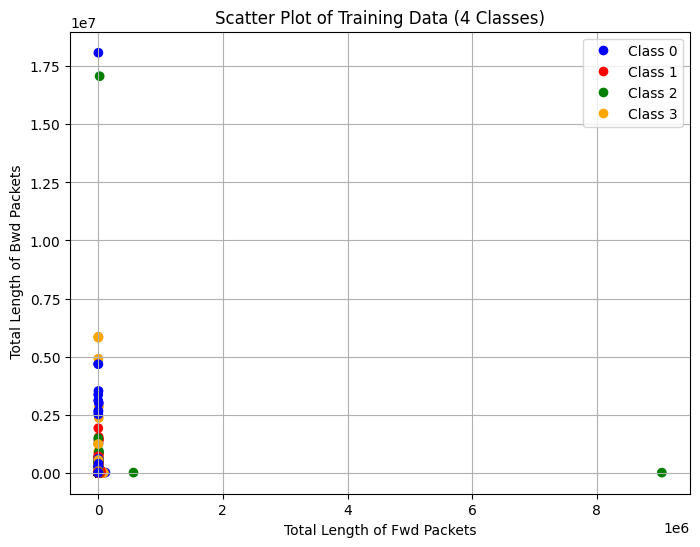

In [42]:
Q3_modified_4_classes(df)

In [54]:
def Q4_modified(data, k):
    # Choose two columns from the dataset to use as features for X
    X = data[['Total Length of Fwd Packets', ' Total Length of Bwd Packets']].values
    y = data['Label'].values

    # Split the data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Create a scatter plot with colors for each class
    unique_classes = np.unique(y)
    colormap = plt.get_cmap('tab10')  # Use a colormap with enough colors

    # Create scatter plot for test data
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=colormap, s=50, alpha=0.5)

    # Add color bar
    plt.colorbar(scatter, ticks=range(len(unique_classes)), label='Class Label')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('kNN Classification Results on Test Data')
    plt.grid(True)
    plt.show()


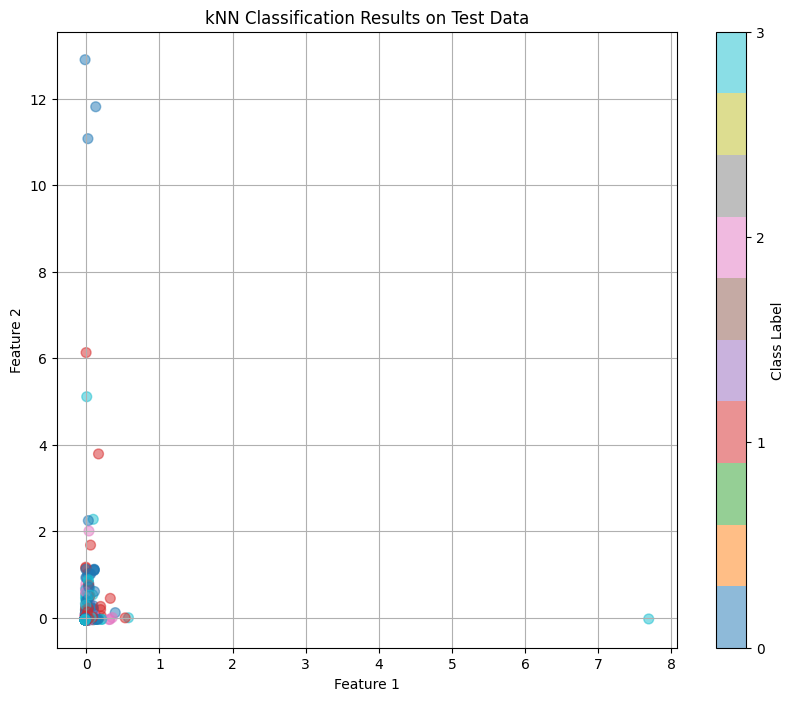

In [51]:
Q4_modified(df, 3)

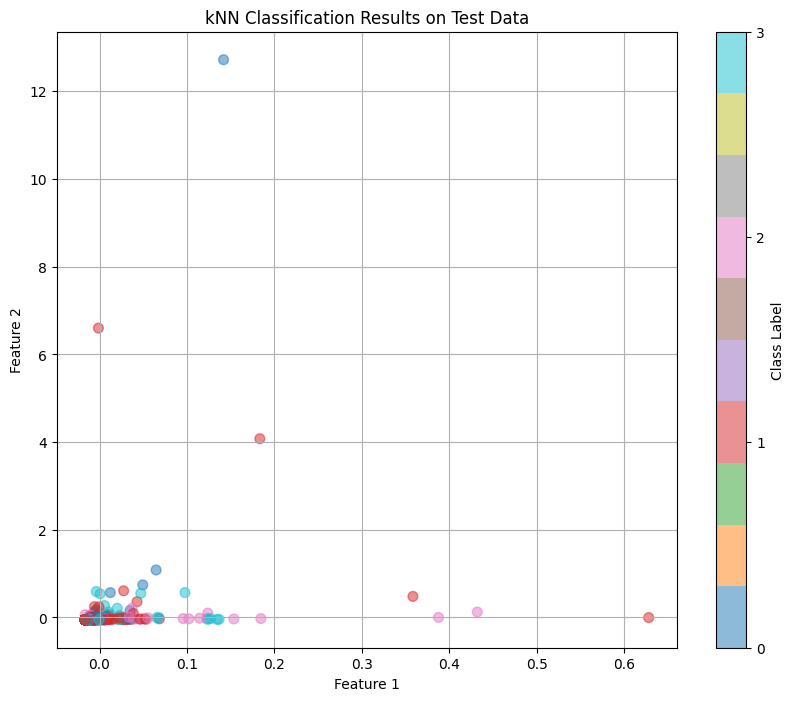

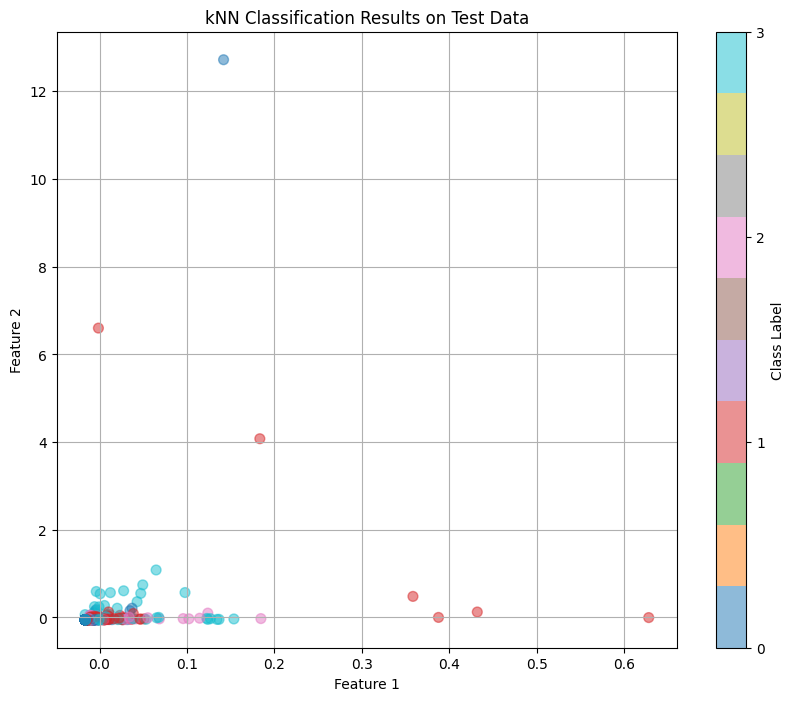

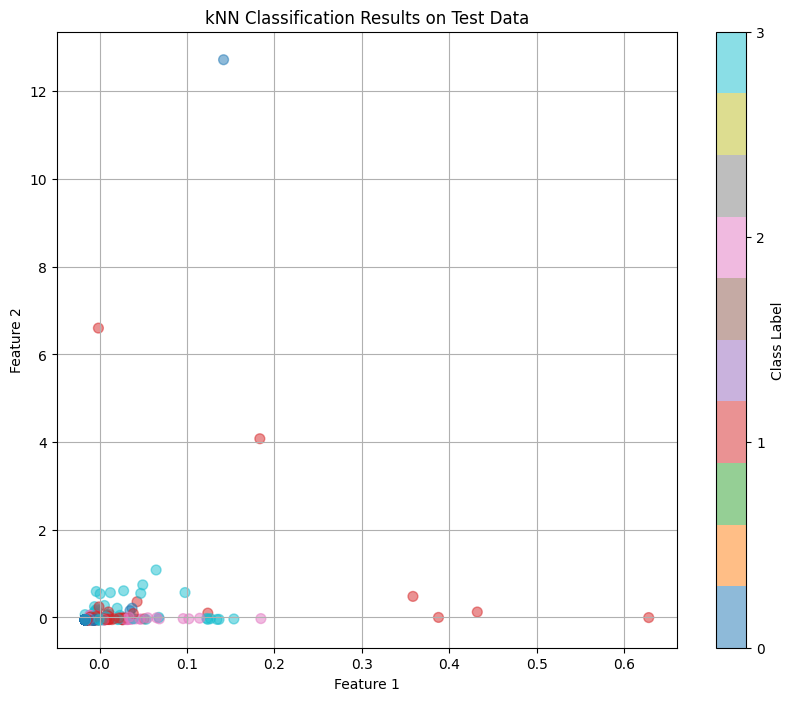

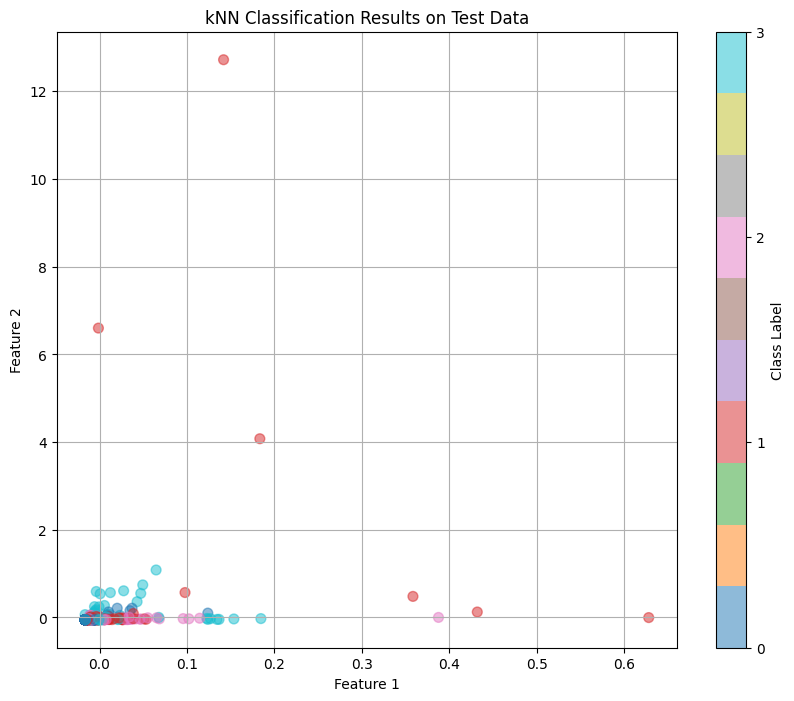

In [55]:
for k in [12, 32, 45, 60]:
    Q4_modified(df, k)

Best k value: 21
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.20      0.26       992
           1       0.25      0.63      0.36       917
           2       0.28      0.14      0.19       948
           3       0.32      0.18      0.23       937

    accuracy                           0.28      3794
   macro avg       0.31      0.29      0.26      3794
weighted avg       0.31      0.28      0.26      3794



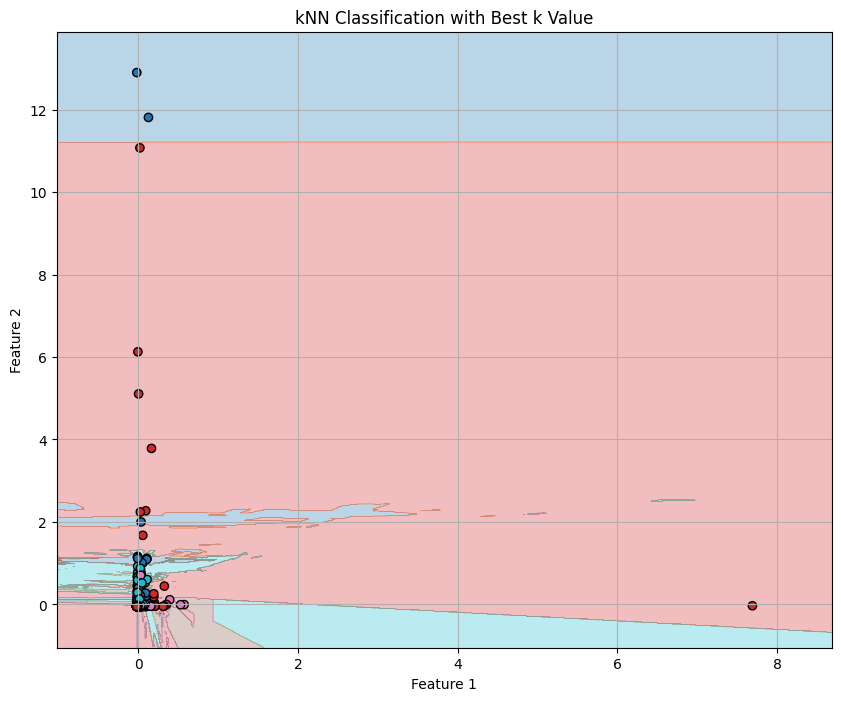

In [58]:
def q5(data):
    # Choose two columns from the dataset to use as features for X
    X = data[['Total Length of Fwd Packets', ' Total Length of Bwd Packets']].values
    y = data['Label'].values  # Target variable

    # Split the data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features (important for kNN)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_neighbors': range(17, 27)  # You can adjust the range as needed
    }

    # Initialize the kNN classifier
    knn = KNeighborsClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Best k value
    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k value: {best_k}")

    # Train the kNN classifier with the best k value
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = best_knn.predict(X_test)

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot the decision boundaries
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor='k', cmap='tab10')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('kNN Classification with Best k Value')
    plt.grid(True)
    plt.show()


# Call the function with the dataset
q5(df)
